## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.609187 -1.625404  1.490624 -0.421795  0.161741 -0.696029
1  0.886163  1.138097  0.345783  0.407750  0.692479  1.157791
2 -1.459978 -0.762775  0.441548  0.688856 -0.391023 -0.989422
3 -1.409940  0.563684  0.879356  0.449391 -1.098602 -0.825606
4 -1.280895 -0.741608  1.327163 -0.642694  0.215302 -0.932769


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0006441	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9911490	total: 70ms	remaining: 35s
2:	learn: 0.9820729	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9710807	total: 71.3ms	remaining: 17.8s
4:	learn: 0.9623094	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9539493	total: 72.5ms	remaining: 12s
6:	learn: 0.9440125	total: 73ms	remaining: 10.4s
7:	learn: 0.9358250	total: 73.6ms	remaining: 9.12s
8:	learn: 0.9278141	total: 74.2ms	remaining: 8.17s
9:	learn: 0.9181287	total: 74.7ms	remaining: 7.39s
10:	learn: 0.9091175	total: 75.3ms	remaining: 6.77s
11:	learn: 0.9010858	total: 75.8ms	remaining: 6.24s
12:	learn: 0.8919828	total: 76.4ms	remaining: 5.8s
13:	learn: 0.8837327	total: 76.8ms	remaining: 5.41s
14:	learn: 0.8772042	total: 77.3ms	remaining: 5.08s
15:	learn: 0.8678278	total: 77.8ms	remaining: 4.78s
16:	learn: 0.8596654	total: 78.3ms	remaining: 4.53s
17:	learn: 0.8515896	total: 78.7ms	remaining: 4.29s
18:	learn: 0.8438762	total: 79.3ms	remaining: 4.09s
1

81:	learn: 0.4979648	total: 109ms	remaining: 1.22s
82:	learn: 0.4941564	total: 109ms	remaining: 1.21s
83:	learn: 0.4909655	total: 110ms	remaining: 1.2s
84:	learn: 0.4872265	total: 110ms	remaining: 1.19s
85:	learn: 0.4836823	total: 111ms	remaining: 1.18s
86:	learn: 0.4794412	total: 111ms	remaining: 1.17s
87:	learn: 0.4749720	total: 111ms	remaining: 1.16s
88:	learn: 0.4707990	total: 112ms	remaining: 1.14s
89:	learn: 0.4666771	total: 112ms	remaining: 1.13s
90:	learn: 0.4633030	total: 113ms	remaining: 1.12s
91:	learn: 0.4599079	total: 113ms	remaining: 1.11s
92:	learn: 0.4568886	total: 113ms	remaining: 1.1s
93:	learn: 0.4528997	total: 114ms	remaining: 1.1s
94:	learn: 0.4492639	total: 114ms	remaining: 1.09s
95:	learn: 0.4459466	total: 115ms	remaining: 1.08s
96:	learn: 0.4441615	total: 115ms	remaining: 1.07s
97:	learn: 0.4405649	total: 115ms	remaining: 1.06s
98:	learn: 0.4370388	total: 116ms	remaining: 1.05s
99:	learn: 0.4339784	total: 116ms	remaining: 1.04s
100:	learn: 0.4311954	total: 116ms

248:	learn: 0.1563758	total: 187ms	remaining: 565ms
249:	learn: 0.1551707	total: 188ms	remaining: 564ms
250:	learn: 0.1541727	total: 188ms	remaining: 562ms
251:	learn: 0.1530313	total: 189ms	remaining: 560ms
252:	learn: 0.1519056	total: 189ms	remaining: 558ms
253:	learn: 0.1508086	total: 189ms	remaining: 556ms
254:	learn: 0.1498353	total: 190ms	remaining: 555ms
255:	learn: 0.1487280	total: 190ms	remaining: 553ms
256:	learn: 0.1477058	total: 191ms	remaining: 552ms
257:	learn: 0.1466026	total: 191ms	remaining: 550ms
258:	learn: 0.1456205	total: 192ms	remaining: 549ms
259:	learn: 0.1445807	total: 192ms	remaining: 548ms
260:	learn: 0.1437233	total: 193ms	remaining: 546ms
261:	learn: 0.1426558	total: 193ms	remaining: 544ms
262:	learn: 0.1421030	total: 194ms	remaining: 545ms
263:	learn: 0.1410995	total: 195ms	remaining: 543ms
264:	learn: 0.1400910	total: 195ms	remaining: 542ms
265:	learn: 0.1395567	total: 196ms	remaining: 540ms
266:	learn: 0.1386256	total: 196ms	remaining: 539ms
267:	learn: 

468:	learn: 0.0488401	total: 292ms	remaining: 331ms
469:	learn: 0.0485608	total: 293ms	remaining: 331ms
470:	learn: 0.0482809	total: 294ms	remaining: 330ms
471:	learn: 0.0479996	total: 294ms	remaining: 329ms
472:	learn: 0.0477388	total: 294ms	remaining: 328ms
473:	learn: 0.0475883	total: 295ms	remaining: 327ms
474:	learn: 0.0473217	total: 295ms	remaining: 327ms
475:	learn: 0.0470860	total: 296ms	remaining: 326ms
476:	learn: 0.0468355	total: 296ms	remaining: 325ms
477:	learn: 0.0466051	total: 297ms	remaining: 324ms
478:	learn: 0.0463786	total: 297ms	remaining: 323ms
479:	learn: 0.0461372	total: 298ms	remaining: 322ms
480:	learn: 0.0458868	total: 298ms	remaining: 321ms
481:	learn: 0.0458173	total: 298ms	remaining: 321ms
482:	learn: 0.0455689	total: 299ms	remaining: 320ms
483:	learn: 0.0455003	total: 299ms	remaining: 319ms
484:	learn: 0.0454323	total: 299ms	remaining: 318ms
485:	learn: 0.0451959	total: 300ms	remaining: 317ms
486:	learn: 0.0451291	total: 300ms	remaining: 316ms
487:	learn: 

632:	learn: 0.0249310	total: 370ms	remaining: 215ms
633:	learn: 0.0248365	total: 371ms	remaining: 214ms
634:	learn: 0.0247449	total: 372ms	remaining: 214ms
635:	learn: 0.0246508	total: 372ms	remaining: 213ms
636:	learn: 0.0245779	total: 372ms	remaining: 212ms
637:	learn: 0.0244950	total: 373ms	remaining: 212ms
638:	learn: 0.0244240	total: 373ms	remaining: 211ms
639:	learn: 0.0243546	total: 374ms	remaining: 210ms
640:	learn: 0.0242721	total: 374ms	remaining: 210ms
641:	learn: 0.0241919	total: 374ms	remaining: 209ms
642:	learn: 0.0241141	total: 375ms	remaining: 208ms
643:	learn: 0.0240327	total: 375ms	remaining: 207ms
644:	learn: 0.0239571	total: 376ms	remaining: 207ms
645:	learn: 0.0239063	total: 376ms	remaining: 206ms
646:	learn: 0.0238613	total: 377ms	remaining: 206ms
647:	learn: 0.0238172	total: 377ms	remaining: 205ms
648:	learn: 0.0237259	total: 378ms	remaining: 204ms
649:	learn: 0.0236590	total: 378ms	remaining: 204ms
650:	learn: 0.0235941	total: 379ms	remaining: 203ms
651:	learn: 

851:	learn: 0.0128347	total: 476ms	remaining: 82.7ms
852:	learn: 0.0127894	total: 477ms	remaining: 82.2ms
853:	learn: 0.0127489	total: 477ms	remaining: 81.6ms
854:	learn: 0.0127017	total: 478ms	remaining: 81ms
855:	learn: 0.0126817	total: 478ms	remaining: 80.4ms
856:	learn: 0.0126405	total: 479ms	remaining: 79.8ms
857:	learn: 0.0126070	total: 479ms	remaining: 79.3ms
858:	learn: 0.0125625	total: 480ms	remaining: 78.7ms
859:	learn: 0.0125297	total: 480ms	remaining: 78.2ms
860:	learn: 0.0124819	total: 481ms	remaining: 77.6ms
861:	learn: 0.0124351	total: 481ms	remaining: 77ms
862:	learn: 0.0123890	total: 482ms	remaining: 76.5ms
863:	learn: 0.0123457	total: 482ms	remaining: 75.9ms
864:	learn: 0.0123135	total: 482ms	remaining: 75.3ms
865:	learn: 0.0122682	total: 483ms	remaining: 74.7ms
866:	learn: 0.0122157	total: 483ms	remaining: 74.2ms
867:	learn: 0.0121736	total: 484ms	remaining: 73.6ms
868:	learn: 0.0121422	total: 484ms	remaining: 73ms
869:	learn: 0.0121016	total: 484ms	remaining: 72.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

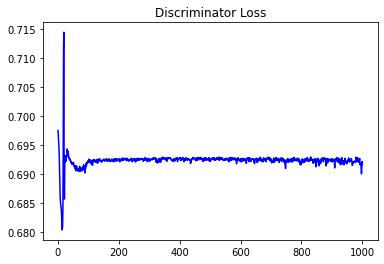

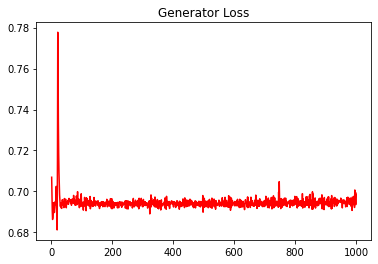

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.032474317152311895


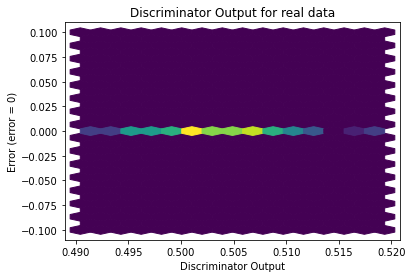

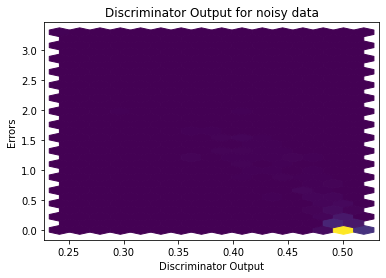

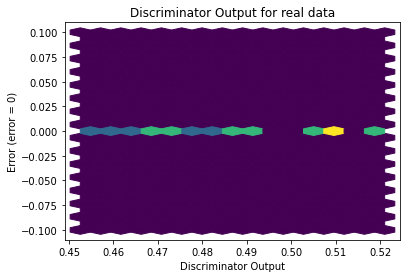

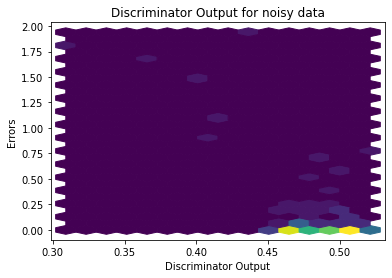

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


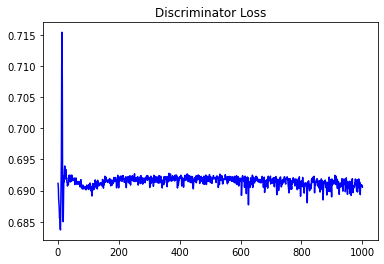

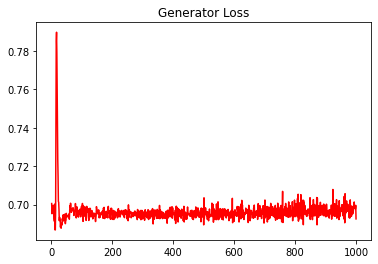

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04897565243524189


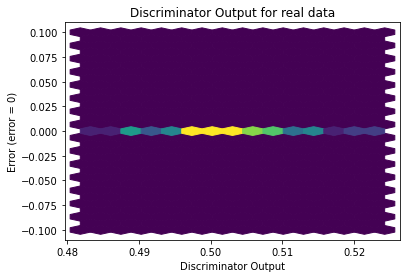

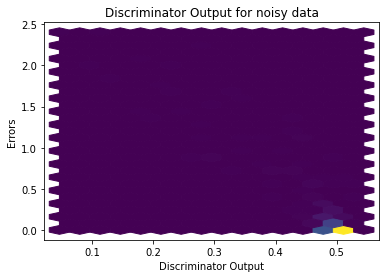

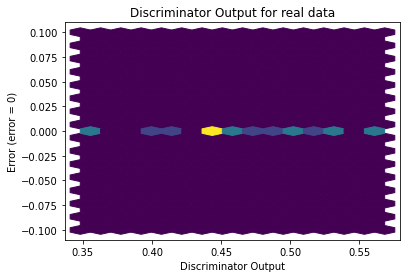

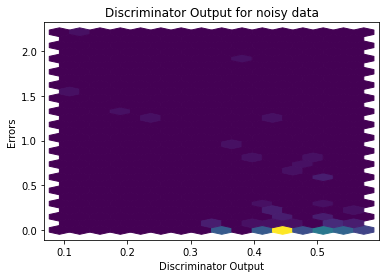

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7725]], requires_grad=True)
